In [21]:
#import libraries
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 200)

In [3]:
#solving 2 equation by matrix ( Ainverse * b = x)
a= np.array([[627 , 73], [73,10]])
b= np.array([1242, 140])
ainv= np.linalg.inv(a)
x = np.dot(ainv,b)
x

array([ 2.33793836, -3.06695005])

In [36]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1200, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [37]:
X = np.array([1,2,4,6,8])
y = np.array([3,5,5,4,8])


In [38]:
gradients = gradient(X,y)
gradients.tail(700)

,m_current,c_current,cost
500,0.522515,2.753398,1.249748
501,0.522332,2.754439,1.249636
502,0.522151,2.755474,1.249525
503,0.521970,2.756504,1.249414
504,0.521790,2.757528,1.249305
505,0.521611,2.758547,1.249197
506,0.521433,2.759561,1.249091
507,0.521257,2.760570,1.248985
508,0.521081,2.761573,1.248880
509,0.520905,2.762570,1.248777


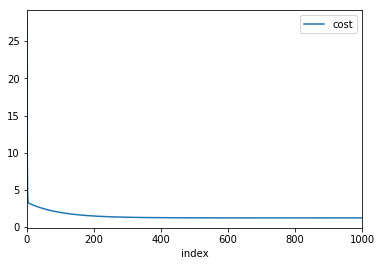

In [35]:
# plotting cost against num_iterations , as we can see cost funciton becomes costant after 1193 , 
#so we can use 0.488 (optimal m value) and 2.946 ( optimal c value) 
gradients.reset_index().plot.line(x='index', y=['cost'])

# Gradient by closed  form Derivative method (use sympy derivative function)

In [31]:
# need to import sympy library
from sympy import * 
import sympy as sp

In [32]:
# Test example to solve any equation x**2 +1
x = Symbol('x')
y = x**2 +1
yder= y.diff(x)
yder

2*x

#### Defining cost function for x and y points 
- x = 1,2,4,6,8
- y = 3,5,5,4,8 
- CF = ((3-m-c)** 2) +((5-2*m-c)* * *2) + ((5-4*m-c)* * *2 )+ ((4-6*m-c)* * *2 )+ ((8-8*m-c)*  * *2)

In [29]:
# Real example lets say you have below Cost function 
m,c= symbols('m c') 
print(m,c)
# below cost function defined for x and y points
cf = ((3-m-c)**2) +((5-2*m-c)**2) + ((5-4*m-c)**2 )+ ((4-6*m-c)**2 )+ ((8-8*m-c)**2)

#cf.diff is used to calculate the derivated w.r.t m and c
cf_mder = cf.diff(m)
cf_cder = cf.diff(c)

# finally we will get 2 equations
print(cf_mder) 
print(cf_cder)

m c
42*c + 242*m - 242
10*c + 42*m - 50


In [30]:
#solving the equation by equating to 0 and then calculating the m and c value by solve method 

#Step 1 we equate the above derivate Eq to 0 
eq1 = sp.Eq(cf_mder, 0) 
eq2 = sp.Eq(cf_cder, 0) 
print(eq1,eq2)

# below function will help to resolve the Eq and give us m and c value
ans = sp.solve((eq1, eq2), (c,m))
print(ans)
[(key,round(float(value),4)) for key, value in ans.items()]

Eq(42*c + 242*m - 242, 0) Eq(10*c + 42*m - 50, 0)
{c: 121/41, m: 20/41}


[(c, 2.9512), (m, 0.4878)]